## Problem 6.6

This problem refers to problem 5.5 where three different configurations of an LRC network have to be modelled. 


#### Initialization

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

##### Parameter values

First set the parameter values for the rest of the calculations.

In [2]:
R = 10**6    # Ohm
L = 10**-3   # Henry
C = 10**-6   # Farad

and calculate the transfer function parameters:

In [3]:
omegan = 1/np.sqrt(L * C)
zeta = np.sqrt(L * C)/(2 * R * C)

Now define the Transfer functions:

In [4]:
tfa = signal.TransferFunction([omegan**2],[1, 2 * zeta * omegan, omegan**2])
tfb = signal.TransferFunction([2 * zeta * omegan, 0],[1, 2 * zeta * omegan, omegan**2])
tfc = signal.TransferFunction([1, 0, 0],[1, 2 * zeta * omegan, omegan**2])

and construct the Bode-plots:

In [5]:
ws = np.linspace(10**4, 10**5,300)       # Define the frequency range
wa, maga, phasea = tfa.bode(ws)
wb, magb, phaseb = tfb.bode(ws)
wc, magc, phasec = tfc.bode(ws)

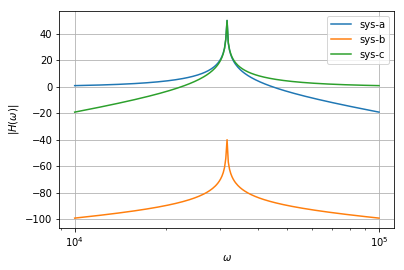

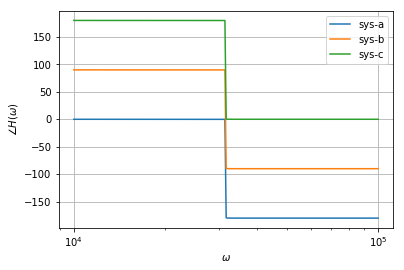

In [14]:
plt.figure()
plt.semilogx(wa, maga, label = 'sys-a')    # Bode magnitude plot system a
plt.semilogx(wb, magb, label = 'sys-b')    # Bode magnitude plot system b
plt.semilogx(wc, magc, label = 'sys-c')    # Bode magnitude plot system c
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)|$')
plt.legend()
plt.grid(True)
plt.figure()
plt.semilogx(wa, phasea, label = 'sys-a')  # Bode phase plot system a
plt.semilogx(wb, phaseb, label = 'sys-b')  # Bode phase plot system b
plt.semilogx(wc, phasec, label = 'sys-c')  # Bode phase plot system c
plt.xlabel (r'$\omega$')
plt.ylabel (r'$\angle H(\omega)$')
plt.legend()
plt.grid(True)
plt.show()

Now calcualte the stepresponse of the three systems:

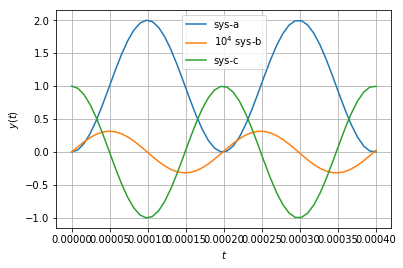

In [19]:
t = np.linspace(0, 4*10**-4)
u = np.ones_like(t)
ta, ya, xa = signal.lsim(tfa, u, t)
tb, yb, xb = signal.lsim(tfb, u, t)
tc, yc, xc = signal.lsim(tfc, u, t)
plt.plot(ta, ya, label = 'sys-a')
plt.plot(tb, yb*10**4, label = r'$10^4$ sys-b')
plt.plot(tc, yc, label = 'sys-c')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
zpka = signal.tf2zpk([omegan**2],[1, 2 * zeta * omegan, omegan**2])
zpkb = signal.tf2zpk([2 * zeta * omegan, 0],[1, 2 * zeta * omegan, omegan**2])
zpkc = signal.tf2zpk([1, 0, 0],[1, 2 * zeta * omegan, omegan**2])

In [13]:
print('poles of system a are: ', zpka[1])
print('zeros of system a are: ', zpka[0])
print('poles of system b are: ', zpkb[1])
print('zeros of system b are: ', zpkb[0])
print('poles of system c are: ', zpkc[1])
print('zeros of system c are: ', zpkc[0])

poles of system a are:  [-0.5+31622.77659773j -0.5-31622.77659773j]
zeros of system a are:  []
poles of system b are:  [-0.5+31622.77659773j -0.5-31622.77659773j]
zeros of system b are:  [0.]
poles of system c are:  [-0.5+31622.77659773j -0.5-31622.77659773j]
zeros of system c are:  [0. 0.]
